<a href="https://colab.research.google.com/github/raphaelp-silva/deep_learning_pratico_com_tensorflow_e_python/blob/main/rede_neural_previsao_lucros_de_vendas_de_sorvetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Definição do problema

- Base de dados:
  - Input (X): Temperatura
  - Output (Y): Lucro diário em dólares

# Etapa 1: Importação das bibliotecas

In [114]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.17.1'

# Etapa 2: Importação da base de dados

In [115]:
# Leitura do arquivo csv
sales_df = pd.read_csv('/content/SalesData.csv')

In [116]:
# Visualização de todos os registros
sales_df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [117]:
# Visualização dos 5 primeiros registros
sales_df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [118]:
# Visualização dos 10 últimos registros
sales_df.tail(10)

,Temperature,Revenue
490,23.824922,584.399945
491,34.472169,809.352519
492,23.056214,552.819351
493,14.931506,377.430928
494,25.112066,571.434257
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [119]:
# Visualização de informações da base de dados
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [120]:
# Descrição da base de dados
sales_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


# Etapa 3: Visualização da base de dados

Text(0.5, 1.0, 'Revenue x Temperature')

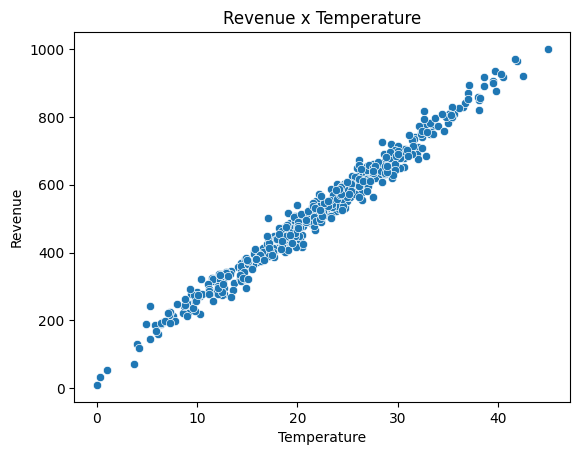

In [121]:
# Scatter plot do Seborn
sns.scatterplot(x='Temperature', y='Revenue', data=sales_df)
plt.title('Revenue x Temperature')

# Etapa 4: Criação das variáveis da base de dados

In [122]:
# Criação das variáveis X_train e y_train
X_train = sales_df['Temperature']
Y_train = sales_df['Revenue']

In [123]:
# Formato da variável X_train
X_train.shape

(500,)

In [124]:
# Formato da variável y_train
Y_train.shape

(500,)

# Etapa 5: Criação e construção do modelo

In [125]:
# Construção do modelo sequencial
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 5, input_shape = [1]))
model.add(tf.keras.layers.Dense(units = 1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [126]:
# Sumário do modelo
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 5)                   │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16 (64.00 B)

 Trainable params: 16 (64.00 B)

 Non-trainable params: 0 (0.00 B)

In [127]:
# Compilar o modelo
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')

In [128]:
# Treinamento
epochs_hist = model.fit(X_train, Y_train, epochs=500)

Epoch 1/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 237057.8281
Epoch 2/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17539.7520
Epoch 3/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4412.6318  
Epoch 4/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1930.9824  
Epoch 5/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 976.1115 
Epoch 6/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 766.5251 
Epoch 7/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 645.6874 
Epoch 8/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 656.2122 
Epoch 9/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 687.4647 
Epoch 10/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 748.5498  
Epoch 11/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 725.4257 
Epoch 12/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 613.1818 
Epoch 13/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 628.9700 
Epoch 14/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 710.9619 
Epoch 15/500
16/16 ━

# Etapa 6: Avaliação do modelo

In [129]:
# Visualização do dicionário com os resultados
epochs_hist.history.keys()

dict_keys(['loss'])

Text(0, 0.5, 'Loss')

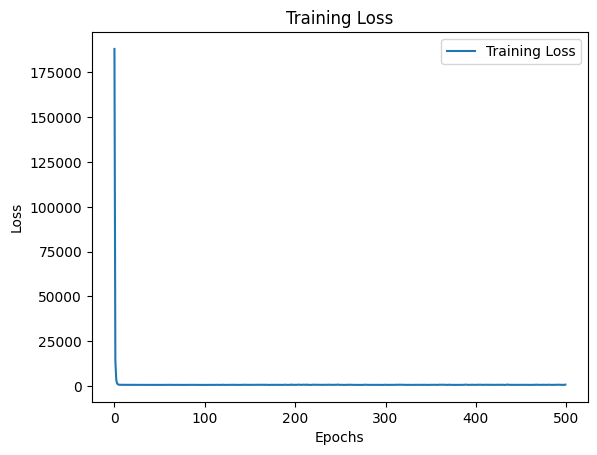

In [130]:
# Gráfico com os resultados da loss function
plt.plot(epochs_hist.history['loss'])
plt.title('Training Loss')
plt.legend(['Training Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [131]:
# Visualização dos pesos
model.get_weights()

[array([[ 0.01307464, -3.1357336 ,  2.4764433 ,  2.3222828 ,  0.09221472]],
       dtype=float32),
 array([-0.14389965, -5.131758  ,  4.794288  ,  4.7281427 , -2.2519584 ],
       dtype=float32),
 array([[-1.9952096e-04],
        [-3.1438334e+00],
        [ 2.3381629e+00],
        [ 2.3016834e+00],
        [-1.0623541e-02]], dtype=float32),
 array([6.2780547], dtype=float32)]

In [132]:
# Previsões com o modelo treinado, com a temperatura de 5 graus
temp = 5
previsao_vendas = model.predict(np.array([temp]))
previsao_vendas

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


array([[149.49158]], dtype=float32)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


Text(0, 0.5, 'Revenue')

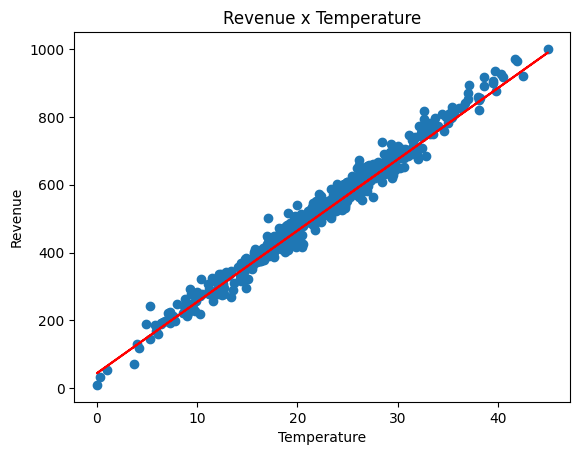

In [133]:
# Gráfico com a reta da regressão linear
plt.scatter(X_train, Y_train)
plt.plot(X_train, model.predict(X_train), color = 'red')
plt.title('Revenue x Temperature')
plt.xlabel('Temperature')
plt.ylabel('Revenue')

# Etapa 7: Confirmar os resultados usando sklearn

In [135]:
# Usar o sklearn para obter os mesmos resultados
X_train.shape

(500,)

In [136]:
X_train = X_train.values.reshape(-1, 1)

In [137]:
X_train.shape

(500, 1)

In [138]:
Y_train = Y_train.values.reshape(-1, 1)

In [139]:
Y_train.shape

(500, 1)

In [151]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [153]:
regressor.coef_

array([[21.44362551]])

In [154]:
regressor.intercept_

array([44.83126709])

Text(0, 0.5, 'Revenue')

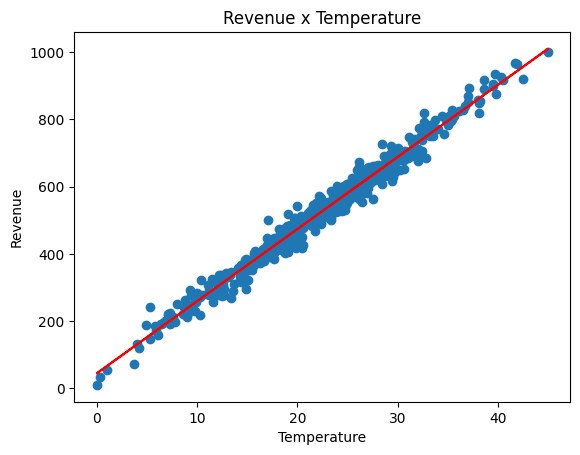

In [155]:
# Gráfico com a reta da regressão linear
plt.scatter(X_train, Y_train)
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.title('Revenue x Temperature')
plt.xlabel('Temperature')
plt.ylabel('Revenue')

In [157]:
# Previsões com o modelo treinado, com a temperatura de 5 graus
temp = 5
previsao_vendas = regressor.predict(np.array([[temp]]))
previsao_vendas

array([[152.04939464]])